In [1]:
import heapq
import matplotlib.pyplot as plt

In [2]:
# to define the heuristic function
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

In [3]:
def astar(start, goal, grid):
    rows, cols = len(grid), len(grid[0])
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while open_set:
        current = heapq.heappop(open_set)[1]

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            return path[::-1]  # Return reversed path

        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            neighbor = (current[0] + dx, current[1] + dy)

            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and grid[neighbor[0]][neighbor[1]] == 0:
                tentative_g_score = g_score[current] + 1

                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)

                    if neighbor not in [i[1] for i in open_set]:
                        heapq.heappush(open_set, (f_score[neighbor], neighbor))

    return []  # Return empty path if no path found

In [4]:
maze = [
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0],        
    [0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0]
]

In [5]:
start = (0, 0)
goal = (4, 4)
path = astar(start, goal, maze) 
print("Path found:", path)  

Path found: [(0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]


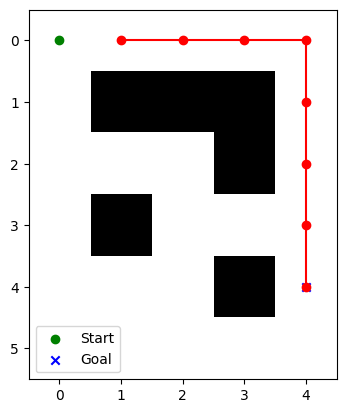

In [6]:
# to visualize the path
def plot_path(maze, path):
    plt.imshow(maze, cmap='gray_r')
    if path:
        x, y = zip(*path)
        plt.plot(y, x, marker='o', color='red')
    plt.scatter(start[1], start[0], marker='o', color='green', label='Start')
    plt.scatter(goal[1], goal[0], marker='x', color='blue', label='Goal')
    plt.legend()
    plt.show()
plot_path(maze, path)